In [49]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
import csv

# sklearn imports for crossval, model and losses

In [50]:
def plot_samples(X, y):
    fig, ax = plt.subplots()
    ax.scatter(X, y, s=4, label="Samples")
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

In [51]:
def plot_samples_and_poly_predictions(X, y, model, n):
    """
    This function plots X and y predictions of a model in the range indicated by
    X and y (X must be 1-D) of a given linear scikit learn model. The X values for
    plotting the model predictions are extended to polynomial features of 
    degree n in descending order (x^n, x^(n-1), ...)
    """

    fig, ax = plt.subplots()
    ax.scatter(X, y, s=4, label="Samples")

    X_pred = np.linspace(np.min(X), np.max(X), 100)
    X_pred_poly = np.vander(X_pred, N=n+1)

    y_plot = model.predict(X_pred_poly)

    ax.plot(
        X_pred,
        y_plot,
        linewidth=2,
        label="Model",
    )
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.legend()
    
    fig.tight_layout()

In [52]:
def load_dataset_csv(data_path):
    """Reads from a csv file assuming two columns (2D) representing X and y
    of a regression problem."""
    with open(data_path, newline='') as f:
        csv_reader = csv.reader(f)    

        next(csv_reader)

        X = []
        y = []

        for row in csv_reader:
            X.append(row[0])
            y.append(row[1])
        
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)

    return X, y

In [53]:
def plotBestModel(x, y, alphas):
    poly = PolynomialFeatures(9)
    x_2d = x.reshape(-1, 1)
    x_poly = poly.fit_transform(x_2d)
    model = RidgeCV(alphas, cv=10)
    model.fit(x_poly, y)
    
    plot_samples_and_poly_predictions(x, y, model, 9)

<Figure size 640x480 with 0 Axes>

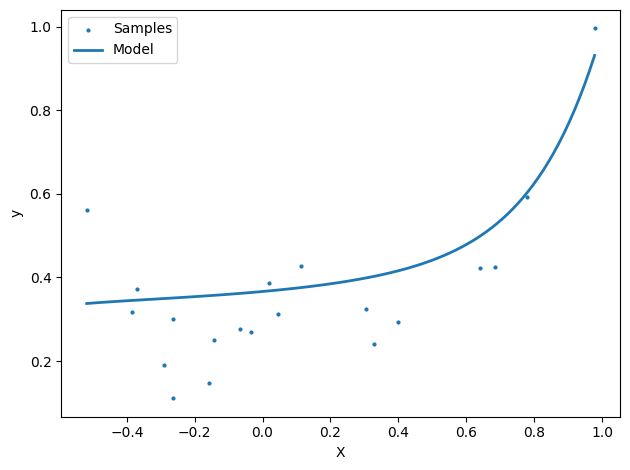

<Figure size 640x480 with 0 Axes>

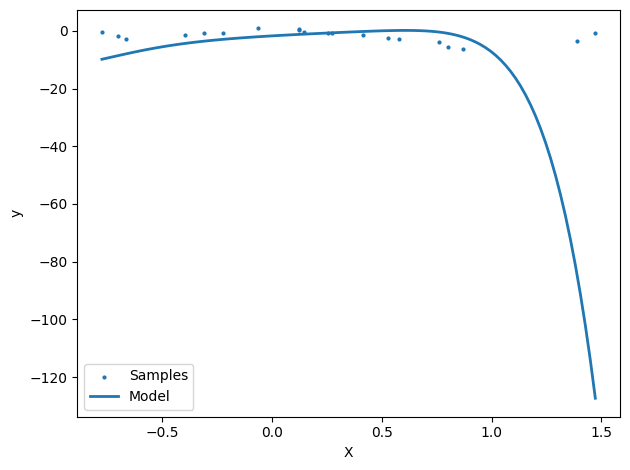

In [54]:
# For each dataset:
for dataset in ['./regularization_dataset0.csv', 'regularization_dataset1.csv']:
    x, y = load_dataset_csv(dataset)
    
    plt.figure()

    alphas = np.logspace(-12, 6, 19) # 10^(-12) - 10^6 (19 values)
    plotBestModel(x, y, alphas)